# ResStock <> Parcel Data Matching
Notebook explores parcel and ResStock data for Wakefield and introduces methodology to select a ResStock building based on parcel information.

## Parcel Data
First, read in parcel data. Includes some quick looks at variables of interest:
* Floor area
* Vintage
* Heat fuel
* Heat type

We are ***only*** going to consider parcels on the example streets of interest. These are:
* Wolcott Street
* Willow Street
* Cutter Street

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PARCEL_FILEPATH = "./../parcel_database/database/wakefield_final_parcel_data.csv"


In [3]:
parcel_df = pd.read_csv(PARCEL_FILEPATH)

/var/folders/q4/7911fbv57wv3c68srp1cdlkm0000gn/T/ipykernel_60153/2625864370.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  parcel_df = pd.read_csv(PARCEL_FILEPATH)


In [4]:
parcel_df.head()

,PCL ID,Property Account Number,ST NU,ST ALT,LOCATION,CONDO_UNIT,COMPLEX_NAME,OWNER,OWNER 2,OWNER 3,...,BUILD VAL,TOTAL VAL,ADJ AREA,STATE CODE,Decade Built,Age Category,Heat System,Number of Units,Building Type,Use Class
0,07-069-182C,10006.0,NaN,NaN,WALNUT ST,NaN,NaN,"MERULLO, WILLIAM D",WILLIAM J MERULLO,NaN,...,0,56700,NaN,F_769337_3008027,NaN,POST2000,NaN,0,NaN,NaN
1,07-042-184A,10014.0,63,-63A,CEDAR ST,NaN,NaN,"KLINE, ROBERT A",NaN,NaN,...,402100,657600,5461.0,F_769446_3007971,1930.0,PRE1950,STEAM,3,Small Multifamily,Residential
2,07-036-188A,10022.0,31,NaN,GOULD ST,NaN,NaN,GOLDSTEIN ALLAN,DADY-GOLDSTEIN DIANE M,NaN,...,212800,470500,2359.2,F_769416_3007700,1910.0,PRE1950,DUCTED,1,Single Family,Residential
3,02-006-20C,1003.0,NaN,NaN,PARKER RD,NaN,NaN,TOWN OF WAKEFIELD,BOARD OF SELECTMEN,NaN,...,0,153500,NaN,F_766364_3011614,NaN,POST2000,NaN,0,NaN,NaN
4,07-038-191A,10031.0,27,NaN,GOULD ST,NaN,NaN,"PASSERINI, PATRICK A",JOYCE K PASSERINI,NaN,...,251800,507100,2963.0,F_769530_3007727,1900.0,PRE1950,NON-DUCTED,1,Single Family,Residential


In [5]:
parcel_df = parcel_df[parcel_df["LOCATION"].isin(["WOLCOTT ST", "WILLOW ST", "CUTTER ST"])]

In [6]:
parcel_df.head()

,PCL ID,Property Account Number,ST NU,ST ALT,LOCATION,CONDO_UNIT,COMPLEX_NAME,OWNER,OWNER 2,OWNER 3,...,BUILD VAL,TOTAL VAL,ADJ AREA,STATE CODE,Decade Built,Age Category,Heat System,Number of Units,Building Type,Use Class
3195,2A-009-0QV,40205.0,9,NaN,WOLCOTT ST,NaN,NaN,VASAPOLI TYSON J,VASAPOLI CHRISTINE M,NaN,...,155200,454200,2184.0,F_767778_3011969,1940.0,PRE1950,DUCTED,1,Single Family,Residential
3196,2A-010-0QW,40213.0,7,NaN,WOLCOTT ST,NaN,NaN,"DEBENEDICTIS, VINCENT P",JOAN E DEBENEDICTIS,NaN,...,190300,493800,2470.5,F_767878_3011991,1940.0,PRE1950,STEAM,1,Single Family,Residential
3197,2A-011-0QX,40221.0,5,NaN,WOLCOTT ST,NaN,NaN,FORD MICHAEL J,FORD DEVON M,NaN,...,188200,474100,2289.0,F_767948_3012028,1940.0,PRE1950,STEAM,1,Single Family,Residential
3198,2A-012-0QY,40230.0,3,NaN,WOLCOTT ST,NaN,NaN,COLLINS SUSAN M,NaN,NaN,...,256400,536200,2952.0,F_768013_3012072,1940.0,PRE1950,STEAM,1,Single Family,Residential
3199,2A-013-0QZ,40248.0,1,NaN,WOLCOTT ST,NaN,NaN,OCALLAHAN ANDREA R,OCALLAHAN DANIEL J,NaN,...,294400,598600,3041.0,F_768082_3012133,1940.0,PRE1950,NON-DUCTED,1,Single Family,Residential


In [7]:
parcel_df.columns

Index(['PCL ID', 'Property Account Number', 'ST NU', 'ST ALT', 'LOCATION',
       'CONDO_UNIT', 'COMPLEX_NAME', 'OWNER', 'OWNER 2', 'OWNER 3', 'MAILING',
       'CITY', 'ST', 'ZIP', 'ZONING', 'UTILITY', 'TRAFFIC', 'LUC', 'YEAR BLT',
       '?PERMIT?', 'ACRES', 'SKETCH AREA', 'DESC', 'FLA',
       'Number of Buildings (Property Cards)', 'ST HT', 'FULL BA', 'ROOMS',
       'BRS', 'BATHS', 'HALF BATHS', 'COND', 'KITCHENS', 'Building Conditions',
       'Fireplaces', 'Solar Hot Water', 'Central Vacuum', 'HEAT TYPE',
       'HEAT FUEL', 'PCT_AIR_CONDITIONED', 'BSMT AREA', 'BSMT_ALT_FINISH',
       'ROOF', 'ROOF_COVER', 'SIDING', 'WALL', 'EXT', 'FLOORS',
       '?CURRENT ASSESSMENT?', 'GRADE', 'COND.1', 'BK / PG', 'DATE',
       'SALES PRICE', 'ARMS Sales', 'GRANTOR LAST NAME', 'BK / PG (2)',
       'DATE (2)', 'Sales Price (2)', 'ARMS Sales (2)',
       'GRANTOR LAST NAME (2)', 'LAND VAL', 'YARD ITEMS', 'BUILD VAL',
       'TOTAL VAL', 'ADJ AREA', 'STATE CODE', 'Decade Built', 'Age Category

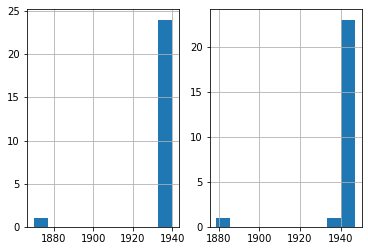

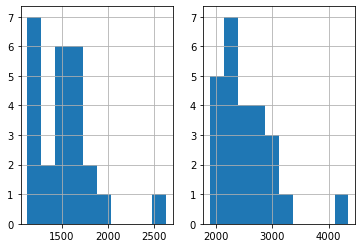

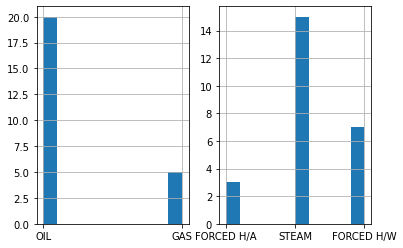

In [8]:
fig, ax = plt.subplots(1, 2)

parcel_df["Decade Built"].hist(ax=ax[0])
parcel_df["YEAR BLT"].hist(ax=ax[1])
plt.show()

fig, ax = plt.subplots(1, 2)
parcel_df["FLA"].hist(ax=ax[0])
parcel_df["ADJ AREA"].hist(ax=ax[1])
plt.show()

fig, ax = plt.subplots(1, 2)
parcel_df["HEAT FUEL"].hist(ax=ax[0])
parcel_df["HEAT TYPE"].hist(ax=ax[1])
plt.show()

In [9]:
parcel_df["FLA"].describe()

count      25.000000
mean     1542.102000
std       311.768908
min      1123.000000
25%      1272.000000
50%      1532.000000
75%      1664.000000
max      2634.750000
Name: FLA, dtype: float64

In [10]:
parcel_df["YEAR BLT"].describe()

count      25.000000
mean     1939.960000
std        12.781758
min      1879.000000
25%      1942.000000
50%      1942.000000
75%      1942.000000
max      1947.000000
Name: YEAR BLT, dtype: float64

## ResStock Data
We will start with the ResStock buildings by filtering based on what exists at our location. There are 143 single-family detached ResStock buildings for our PUMA

In [11]:
RESSTOCK_METADATA_FILEPATH = "./wakefield_metadata.csv"
metadata_df = pd.read_csv(RESSTOCK_METADATA_FILEPATH)

In [12]:
# First, filter for single-family detached homes
metadata_df = metadata_df[metadata_df["in.geometry_building_type_acs"]=="Single-Family Detached"]

In [13]:
# Dropping some columns that are consistent for our entire region
metadata_df = metadata_df.drop(columns=[
    "in.county", "in.puma", "in.ashrae_iecc_climate_zone_2004", "in.building_america_climate_zone",
    "in.iso_rto_region", "applicability", "weight", "in.ahs_region", "in.census_division",
    "in.census_division_recs", "in.census_region"
])

In [14]:
metadata_df.head()

,bldg_id,in.sqft,in.applicable,in.bathroom_spot_vent_hour,in.bedrooms,in.cec_climate_zone,in.ceiling_fan,in.clothes_dryer,in.clothes_washer,in.clothes_washer_presence,...,in.door_area_ft_2,in.duct_unconditioned_surface_area_ft_2,in.floor_area_attic_ft_2,in.floor_area_conditioned_ft_2,in.floor_area_lighting_ft_2,in.roof_area_ft_2,in.wall_area_above_grade_conditioned_ft_2,in.wall_area_above_grade_exterior_ft_2,in.wall_area_below_grade_ft_2,in.window_area_ft_2
1,3917,1690.0,True,Hour1,3,None,None,"Electric, 120% Usage","EnergyStar, 120% Usage",Yes,...,20.0,0.00,845.0,1690.0,2266.0,1588.73,1123.98,1545.34,835.98,250.79
2,8736,1690.0,True,Hour8,3,None,Standard Efficiency,None,"EnergyStar, 100% Usage",Yes,...,20.0,468.98,845.0,1690.0,1690.0,944.74,1941.33,2058.69,485.33,174.72
5,20978,8194.0,True,Hour6,5,None,Standard Efficiency,"Gas, 100% Usage","Standard, 100% Usage",Yes,...,20.0,2273.84,4385.0,8194.0,8770.0,4902.58,4466.69,5299.72,924.67,626.80
6,27520,1220.0,True,Hour21,3,None,Standard Efficiency,"Electric, 100% Usage","EnergyStar, 100% Usage",Yes,...,20.0,390.40,1220.0,1220.0,1220.0,1364.00,1166.33,1335.78,1166.33,349.90
7,28939,2176.0,True,Hour23,5,None,None,"Gas, 100% Usage","EnergyStar, 100% Usage",Yes,...,20.0,603.84,1088.0,2176.0,2176.0,1216.42,2202.86,2353.97,0.00,198.26


In [15]:
print(len(metadata_df))

143


### Floor area
Filter out ResStock buildings based on floor area. The parcel data tells us we don't need anything with a floor area over 3,000 sq. ft.

<AxesSubplot:>

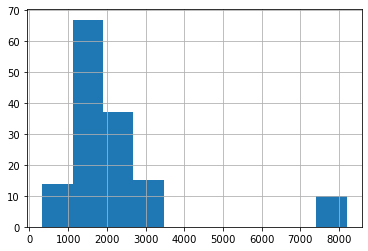

In [16]:
# Match to FLA in parcel database
# "in.sqft" is "Finished floor area of the housing unit"
metadata_df["in.sqft"].hist()

In [17]:
metadata_df["in.sqft"].describe()

count     143.000000
mean     2298.286713
std      1763.980313
min       328.000000
25%      1220.000000
50%      1690.000000
75%      2176.000000
max      8194.000000
Name: in.sqft, dtype: float64

In [18]:
metadata_df = metadata_df[metadata_df["in.sqft"] < 3000]

<AxesSubplot:>

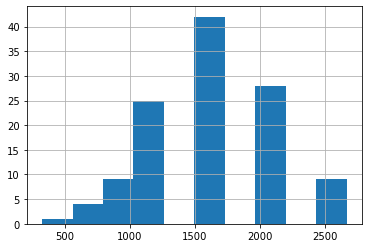

In [19]:
metadata_df["in.sqft"].hist()

In [20]:
metadata_df["in.sqft"].describe()

count     118.000000
mean     1671.186441
std       529.239479
min       328.000000
25%      1220.000000
50%      1690.000000
75%      2176.000000
max      2663.000000
Name: in.sqft, dtype: float64

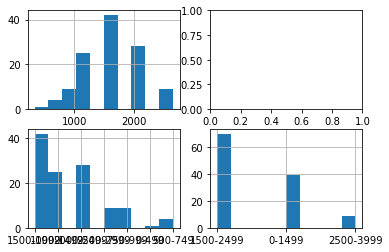

In [21]:
fig, ax = plt.subplots(2, 2)
metadata_df["in.sqft"].hist(ax=ax[0, 0])
metadata_df["in.geometry_floor_area"].hist(ax=ax[1, 0])
metadata_df["in.geometry_floor_area_bin"].hist(ax=ax[1, 1])

plt.show()

In [22]:
metadata_df[["in.sqft", "in.geometry_floor_area", "in.geometry_floor_area_bin"]]

,in.sqft,in.geometry_floor_area,in.geometry_floor_area_bin
1,1690.0,1500-1999,1500-2499
2,1690.0,1500-1999,1500-2499
6,1220.0,1000-1499,0-1499
7,2176.0,2000-2499,1500-2499
10,1220.0,1000-1499,0-1499
...,...,...,...
233,633.0,500-749,0-1499
234,1220.0,1000-1499,0-1499
235,1220.0,1000-1499,0-1499
236,1690.0,1500-1999,1500-2499


#### Square footage - notes
Based on the data dictionary, we can have either the exact square footage, or one or two bins.
* Bin 1: `0-499|1000-1499|1500-1999|2000-2499|2500-2999|3000-3999|4000+|500-749|750-999`
* Bin 2: `0-1499|1500-2499|2500-3999|4000+`

### Heating fuel
For our parcels, the buildings just have Gas and Oil. Mapping to ResStock:
* "GAS" in the parcel data = "Natural Gas" in ResStock
* "OIL" in the parcel data = "Fuel Oil" in ResStock.

<AxesSubplot:>

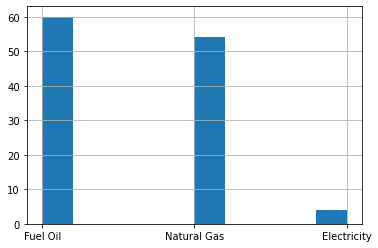

In [23]:
metadata_df["in.heating_fuel"].hist()

<AxesSubplot:>

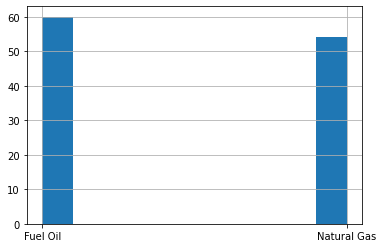

In [24]:
# Can filter out electric for this group of homes
metadata_df = metadata_df[metadata_df["in.heating_fuel"].isin(["Natural Gas", "Fuel Oil"])]
metadata_df["in.heating_fuel"].hist()

### Vintage
Our parcels were all built before 1950, so we can filter out ResStock buildings based on vintage

<AxesSubplot:>

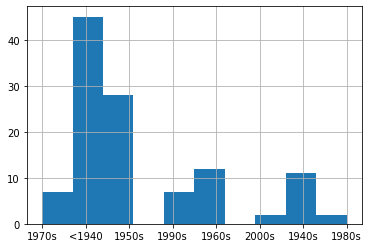

In [25]:
# Vintage
metadata_df["in.vintage"].hist()

In [26]:
# Can filter for only buildings before 1950, based on our streets of interest
metadata_df = metadata_df[metadata_df["in.vintage"].isin(["<1940", "1940s"])]

<AxesSubplot:>

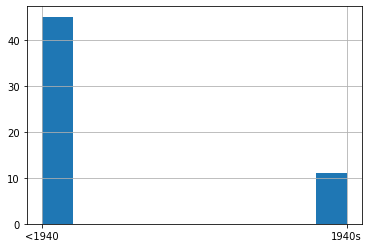

In [27]:
metadata_df["in.vintage"].hist()

In [28]:
len(metadata_df)

56

### ResStock Midpoint Summary
We can lower the number of ResStock buildings from 143 to 56 by filtering the *vintage*, *floor area*, and *heating fuel*

In [29]:
metadata_df.to_csv("./filtered_metadata.csv")

## Compare
Let's pause here and see how many ResStock profiles will be applicable per building in the parcel database.

We'll add a row to the parcel database that is the list of all ResStock building IDs (`"bldg_id"`) applicable to that parcel when we filter by the following:
* `"in.geometry_floor_area_bin"`, which is the *less* restrictive (i.e. broader) floor area bin
* `"in.heating_fuel"`, which again maps as parcel["OIL"] == resstock["Fuel Oil"] and parcel["GAS"] == resstock["Natural Gas"]
* `"in.vintage"`, which is the vintage of the building
* `"in.usage_level"`, which is "Usage of major appliances relative to the national average" and equal to either "High", "Medium", or "Low"

We could also filter by `"in.hvac_heating_type"`, but the ResStock mapping for this is different from our (custom) parcel mapping for "Heat System". ResStock has `"Ducted Heat Pump|Ducted Heating|Non-Ducted Heating|None"` while the parcel database has `"STEAM|DUCTED|NON-DUCTED"`. The parcel data "Heat System" is a derived variable based on the parcel "Heat Type". The main disconnect is how we handle steam (is steam a ducted or non-ducted heating system? In the parcel data, we don't say)

In [30]:
def get_bldg_ids(_x, metadata: pd.DataFrame):
    fla = _x["FLA"]
    heating_fuel = _x["HEAT FUEL"]

    fla_bins = ["0-1499", "1500-2499", "2500-3999", "4000+"]

    fla_bin = None
    if 0 <= fla < 1500:
        fla_bin = fla_bins[0]
    elif 1500 <= fla < 2500:
        fla_bin = fla_bins[1]
    elif 2500 <= fla < 4000:
        fla_bin = fla_bins[2]
    else:
        fla_bin = fla_bins[3]

    heating_fuel_cats = "Electricity|Fuel Oil|Natural Gas|None|Other Fuel|Propane"

    heating_fuel_label = None
    if heating_fuel=="OIL":
        heating_fuel_label = "Fuel Oil"
    elif heating_fuel=="GAS":
        heating_fuel_label = "Natural Gas"

    vintages = ["<1940", "1940s"]

    decade_built = _x["Decade Built"]
    if decade_built == 1940:
        vintage = "1940s"
    else:
        vintage = "<1940"

    resstock_bldgs = metadata[
        metadata["in.heating_fuel"]==heating_fuel_label
    ]
    resstock_bldgs = resstock_bldgs[
        resstock_bldgs["in.geometry_floor_area_bin"]==fla_bin
    ]
    resstock_bldgs = resstock_bldgs[
        resstock_bldgs["in.vintage"]==vintage
    ]
    resstock_bldgs = resstock_bldgs[
        resstock_bldgs["in.usage_level"]=="Medium"
    ]

    return str(resstock_bldgs["bldg_id"].to_list())

In [31]:
parcel_df["resstock_bldg_ids"] = parcel_df.apply(get_bldg_ids, axis=1, args=(metadata_df,))

In [32]:
print(parcel_df[["PCL ID", "resstock_bldg_ids"]])

          PCL ID resstock_bldg_ids
3195  2A-009-0QV  [291837, 467550]
3196  2A-010-0QW  [291837, 467550]
3197  2A-011-0QX  [291837, 467550]
3198  2A-012-0QY  [239227, 383852]
3199  2A-013-0QZ  [313688, 433759]
3612  05-076-QK1  [239227, 383852]
3622  05-077-QL1  [313688, 433759]
3641  05-078-QM1          [470317]
3650  05-079-QM2  [291837, 467550]
3659  05-081-QN1  [239227, 383852]
3668  05-080-QN2  [239227, 383852]
3679  05-082-QP1  [239227, 383852]
3692  05-083-QQ1  [239227, 383852]
3701  05-087-QSA  [291837, 467550]
3711  05-088-QTA  [239227, 383852]
3729  05-089-QUA  [313688, 433759]
3737  05-090-QUB  [239227, 383852]
3782  05-066-0QB          [470317]
3789  05-067-0QC  [239227, 383852]
3793  05-068-0QD          [298675]
3810  05-069-0QE  [239227, 383852]
3819  05-070-0QF  [291837, 467550]
3828  05-071-0QG  [291837, 467550]
3837  05-072-0QH  [240935, 305489]
3867  05-086-0QR  [239227, 383852]


In [33]:
parcel_df["resstock_bldg_ids"].value_counts()

[239227, 383852]    11
[291837, 467550]     7
[313688, 433759]     3
[470317]             2
[298675]             1
[240935, 305489]     1
Name: resstock_bldg_ids, dtype: int64

### Comparison Summary
We are able to get all parcels to match to either one or two ResStock buildings - pretty good!

Also, a number of them are mapping to the same ResStock buildings, which suggests there will be some homogeneity in the final set of ResStock buildings.

## Narrowing down
### Largest count of ResStock buildings
Let's start with the most prevalent ResStock building for the parcel data to choose which is appropriate.

In [34]:
# Going to filter out unecessary columns for readability
parcel_df.columns

Index(['PCL ID', 'Property Account Number', 'ST NU', 'ST ALT', 'LOCATION',
       'CONDO_UNIT', 'COMPLEX_NAME', 'OWNER', 'OWNER 2', 'OWNER 3', 'MAILING',
       'CITY', 'ST', 'ZIP', 'ZONING', 'UTILITY', 'TRAFFIC', 'LUC', 'YEAR BLT',
       '?PERMIT?', 'ACRES', 'SKETCH AREA', 'DESC', 'FLA',
       'Number of Buildings (Property Cards)', 'ST HT', 'FULL BA', 'ROOMS',
       'BRS', 'BATHS', 'HALF BATHS', 'COND', 'KITCHENS', 'Building Conditions',
       'Fireplaces', 'Solar Hot Water', 'Central Vacuum', 'HEAT TYPE',
       'HEAT FUEL', 'PCT_AIR_CONDITIONED', 'BSMT AREA', 'BSMT_ALT_FINISH',
       'ROOF', 'ROOF_COVER', 'SIDING', 'WALL', 'EXT', 'FLOORS',
       '?CURRENT ASSESSMENT?', 'GRADE', 'COND.1', 'BK / PG', 'DATE',
       'SALES PRICE', 'ARMS Sales', 'GRANTOR LAST NAME', 'BK / PG (2)',
       'DATE (2)', 'Sales Price (2)', 'ARMS Sales (2)',
       'GRANTOR LAST NAME (2)', 'LAND VAL', 'YARD ITEMS', 'BUILD VAL',
       'TOTAL VAL', 'ADJ AREA', 'STATE CODE', 'Decade Built', 'Age Category

In [35]:
def get_parcel_df_subset(_parcel_df, resstock_ids: str):
    return _parcel_df[_parcel_df["resstock_bldg_ids"]==resstock_ids][[
        "PCL ID", "YEAR BLT", "FLA", "HEAT TYPE", "HEAT FUEL", "Heat System"
    ]]

In [36]:
test_parcel_df = get_parcel_df_subset(parcel_df, "[239227, 383852]")

In [37]:
test_parcel_df

,PCL ID,YEAR BLT,FLA,HEAT TYPE,HEAT FUEL,Heat System
3198,2A-012-0QY,1945.0,1600.0,STEAM,OIL,STEAM
3612,05-076-QK1,1942.0,1558.4,STEAM,OIL,STEAM
3659,05-081-QN1,1942.0,1500.5,FORCED H/W,OIL,NON-DUCTED
3668,05-080-QN2,1942.0,1560.0,STEAM,OIL,STEAM
3679,05-082-QP1,1942.0,1664.0,STEAM,OIL,STEAM
3692,05-083-QQ1,1942.0,1708.0,FORCED H/A,OIL,DUCTED
3711,05-088-QTA,1942.0,1792.0,FORCED H/W,OIL,NON-DUCTED
3737,05-090-QUB,1942.0,1638.0,FORCED H/A,OIL,DUCTED
3789,05-067-0QC,1942.0,1592.0,STEAM,OIL,STEAM
3810,05-069-0QE,1942.0,1502.4,FORCED H/W,OIL,NON-DUCTED


In [38]:
test_parcel_df["PCL ID"].to_list()

['2A-012-0QY',
 '05-076-QK1',
 '05-081-QN1',
 '05-080-QN2',
 '05-082-QP1',
 '05-083-QQ1',
 '05-088-QTA',
 '05-090-QUB',
 '05-067-0QC',
 '05-069-0QE',
 '05-086-0QR']

In [39]:
def get_resstock_subset(full_resstock_df, bldg_ids: list):
    return full_resstock_df[full_resstock_df["bldg_id"].isin(bldg_ids)][[
        "bldg_id", "in.sqft", "in.clothes_dryer", "in.clothes_washer", "in.cooking_range",
        "in.dishwasher", "in.ducts", "in.heating_fuel", "in.hot_water_fixtures", "in.hvac_has_ducts",
        "in.hvac_heating_type", "in.refrigerator", "in.usage_level", "in.vintage",
        "in.water_heater_fuel"
    ]]

In [40]:
test_resstock_bldgs = get_resstock_subset(metadata_df, [239227, 383852])

In [41]:
test_resstock_bldgs

,bldg_id,in.sqft,in.clothes_dryer,in.clothes_washer,in.cooking_range,in.dishwasher,in.ducts,in.heating_fuel,in.hot_water_fixtures,in.hvac_has_ducts,in.hvac_heating_type,in.refrigerator,in.usage_level,in.vintage,in.water_heater_fuel
102,239227,1690.0,"Electric, 100% Usage","Standard, 100% Usage","Electric, 100% Usage",None,None,Fuel Oil,100% Usage,No,Non-Ducted Heating,"EF 15.9, 100% Usage",Medium,1940s,Fuel Oil
171,383852,1690.0,"Electric, 100% Usage","EnergyStar, 100% Usage","Electric, 100% Usage","318 Rated kWh, 100% Usage","0% Leakage, Uninsulated",Fuel Oil,100% Usage,Yes,Ducted Heating,"EF 17.6, 100% Usage",Medium,1940s,Fuel Oil


#### Summary
For these parcels, I would recommend we go with ResStock building based on the prevalance of ducts. This seems to be the biggest difference between the ResStock buildings and between the parcels. We may have to update our mapping to the parcel columns `"Heat System"` (this is a custom one we came up with, not one that came with the raw dataset). Namely, does `"Heat System"` == `"STEAM"` mean it is ducted or not?

The other option is to assume all buildings have a dishwasher, since the ResStock building here with non-ducted HVAC does not have a dishwasher.

### Next largest group
Let's move on to `"[291837, 467550]"`, the second-most prevalent group of ResStock buildings

In [42]:
test_parcel_df = get_parcel_df_subset(parcel_df, "[291837, 467550]")

In [43]:
test_parcel_df

,PCL ID,YEAR BLT,FLA,HEAT TYPE,HEAT FUEL,Heat System
3195,2A-009-0QV,1947.0,1224.0,FORCED H/A,OIL,DUCTED
3196,2A-010-0QW,1940.0,1237.5,STEAM,OIL,STEAM
3197,2A-011-0QX,1945.0,1188.0,STEAM,OIL,STEAM
3650,05-079-QM2,1942.0,1256.0,STEAM,OIL,STEAM
3701,05-087-QSA,1942.0,1406.0,STEAM,OIL,STEAM
3819,05-070-0QF,1942.0,1400.0,STEAM,OIL,STEAM
3828,05-071-0QG,1942.0,1123.0,STEAM,OIL,STEAM


In [44]:
test_resstock_bldgs = get_resstock_subset(metadata_df, [291837, 383852])

In [45]:
test_resstock_bldgs

,bldg_id,in.sqft,in.clothes_dryer,in.clothes_washer,in.cooking_range,in.dishwasher,in.ducts,in.heating_fuel,in.hot_water_fixtures,in.hvac_has_ducts,in.hvac_heating_type,in.refrigerator,in.usage_level,in.vintage,in.water_heater_fuel
125,291837,633.0,"Gas, 100% Usage","EnergyStar, 100% Usage","Electric, 100% Usage",None,"20% Leakage, Uninsulated",Fuel Oil,100% Usage,Yes,Ducted Heating,"EF 17.6, 100% Usage",Medium,1940s,Natural Gas
171,383852,1690.0,"Electric, 100% Usage","EnergyStar, 100% Usage","Electric, 100% Usage","318 Rated kWh, 100% Usage","0% Leakage, Uninsulated",Fuel Oil,100% Usage,Yes,Ducted Heating,"EF 17.6, 100% Usage",Medium,1940s,Fuel Oil


#### Summary
Here, we should definitely go based on square footage. One ResStock building is half the size of the other, and all the parcel buidlings are much closer to the ResStock building with the larger floor area.

One caveat here, is that we have one parcel marked as having a ducted heating system (the heat type is forced hot air), but the ResStock building has non-ducted heating

### Next
Moving on to the ResStock IDs `[313688, 433759]`, of which we have 3 parcels

In [46]:
test_parcel_df = get_parcel_df_subset(parcel_df, "[313688, 433759]")
test_parcel_df

,PCL ID,YEAR BLT,FLA,HEAT TYPE,HEAT FUEL,Heat System
3199,2A-013-0QZ,1945.0,1885.0,FORCED H/W,GAS,NON-DUCTED
3622,05-077-QL1,1942.0,1828.4,FORCED H/W,GAS,NON-DUCTED
3729,05-089-QUA,1942.0,1718.6,FORCED H/W,GAS,NON-DUCTED


In [47]:
test_resstock_bldgs = get_resstock_subset(metadata_df, [313688, 433759])
test_resstock_bldgs

,bldg_id,in.sqft,in.clothes_dryer,in.clothes_washer,in.cooking_range,in.dishwasher,in.ducts,in.heating_fuel,in.hot_water_fixtures,in.hvac_has_ducts,in.hvac_heating_type,in.refrigerator,in.usage_level,in.vintage,in.water_heater_fuel
134,313688,1690.0,"Electric, 100% Usage","EnergyStar, 100% Usage","Electric, 100% Usage",None,"10% Leakage, Uninsulated",Natural Gas,100% Usage,Yes,Ducted Heating,"EF 15.9, 100% Usage",Medium,1940s,Natural Gas
184,433759,1690.0,"Electric, 100% Usage","EnergyStar, 100% Usage","Gas, 100% Usage","290 Rated kWh, 100% Usage","0% Leakage, Uninsulated",Natural Gas,100% Usage,Yes,Ducted Heating,"EF 17.6, 100% Usage",Medium,1940s,Natural Gas


#### Summary
Biggest difference here - for our purposes - is probably the presence of an electric vs gas cooking range. We are running with the assumption that gas heating fuel means gas cooking, so we will use ResStock bldg ID `433759` for these parcels (they all have gas heating).

### Final parcels
We are left with 4 parcels. All but 1 of them is mapped to a single ResStock building. Let's view them to confirm the mapping, and also to downselect the single remaining parcel with multiple ResStock buildings.

The ResStock buildings are:
* [470317]
* [298675]
* [240935, 305489]

In [48]:
test_parcel_df = get_parcel_df_subset(parcel_df, "[470317]")
test_parcel_df

,PCL ID,YEAR BLT,FLA,HEAT TYPE,HEAT FUEL,Heat System
3641,05-078-QM1,1942.0,1236.0,STEAM,GAS,STEAM
3782,05-066-0QB,1942.0,1272.0,FORCED H/W,GAS,NON-DUCTED


In [49]:
test_resstock_bldgs = get_resstock_subset(metadata_df, [470317])
test_resstock_bldgs

,bldg_id,in.sqft,in.clothes_dryer,in.clothes_washer,in.cooking_range,in.dishwasher,in.ducts,in.heating_fuel,in.hot_water_fixtures,in.hvac_has_ducts,in.hvac_heating_type,in.refrigerator,in.usage_level,in.vintage,in.water_heater_fuel
198,470317,1220.0,"Electric, 100% Usage","Standard, 100% Usage","Gas, 100% Usage",None,"0% Leakage, Uninsulated",Natural Gas,100% Usage,Yes,Ducted Heating,"EF 15.9, 100% Usage",Medium,1940s,Natural Gas


In [50]:
test_parcel_df = get_parcel_df_subset(parcel_df, "[298675]")
test_parcel_df

,PCL ID,YEAR BLT,FLA,HEAT TYPE,HEAT FUEL,Heat System
3793,05-068-0QD,1942.0,2634.75,STEAM,OIL,STEAM


In [51]:
test_resstock_bldgs = get_resstock_subset(metadata_df, [298675])
test_resstock_bldgs

,bldg_id,in.sqft,in.clothes_dryer,in.clothes_washer,in.cooking_range,in.dishwasher,in.ducts,in.heating_fuel,in.hot_water_fixtures,in.hvac_has_ducts,in.hvac_heating_type,in.refrigerator,in.usage_level,in.vintage,in.water_heater_fuel
129,298675,2663.0,None,None,"Electric, 100% Usage","290 Rated kWh, 100% Usage","0% Leakage, Uninsulated",Fuel Oil,100% Usage,Yes,Ducted Heating,"EF 17.6, 100% Usage",Medium,1940s,Fuel Oil


In [52]:
test_parcel_df = get_parcel_df_subset(parcel_df, "[240935, 305489]")
test_parcel_df

,PCL ID,YEAR BLT,FLA,HEAT TYPE,HEAT FUEL,Heat System
3837,05-072-0QH,1879.0,1496.0,STEAM,OIL,STEAM


In [53]:
test_resstock_bldgs = get_resstock_subset(metadata_df, [240935, 305489])
test_resstock_bldgs

,bldg_id,in.sqft,in.clothes_dryer,in.clothes_washer,in.cooking_range,in.dishwasher,in.ducts,in.heating_fuel,in.hot_water_fixtures,in.hvac_has_ducts,in.hvac_heating_type,in.refrigerator,in.usage_level,in.vintage,in.water_heater_fuel
103,240935,1220.0,None,None,"Electric, 100% Usage","318 Rated kWh, 100% Usage","30% Leakage, Uninsulated",Fuel Oil,100% Usage,Yes,Ducted Heating,"EF 19.9, 100% Usage",Medium,<1940,Electricity
130,305489,1220.0,"Gas, 100% Usage","EnergyStar, 100% Usage","Propane, 100% Usage","290 Rated kWh, 100% Usage","0% Leakage, Uninsulated",Fuel Oil,100% Usage,Yes,Ducted Heating,"EF 17.6, 100% Usage",Medium,<1940,Electricity


#### Summary
The matchings here seem ok, with some noticeable differences. The differences are mainly in the matching of heat system to presence of ducts. For the remaining building mapping to two ResStock buildings, I would recommend going with the assumption that these single-family detached homes have a washer/dryer, so we can select the ResStock building with these appliances over the building without.

## Final notes
The filtering methodologly presented here produced mixed results. Filtering by some variables is intuitive, while others require further investigation and possible updates.

First, the ResStock database was filtered by building type (single family detached homes), maximum square footage (3,000 square feet), vintage (only buildings older than 1950), and heating fuel (only gas and oil). This produced a more-manageable dataset with which to match ResStock and parcel buildings.

The remaining ResStock dataset was then filtered, per parcel by:
1. Heating fuel -- matched oil- and gas-heated buildings
2. Floor area bin -- matched parcel floor area to floor area bins from ResStock (0-1,499; 1,500-2,499; 2,500-3,999; 4,000+)
3. Decade built -- matched year built in parcel db to decade built (in.vintage) in ResStock db

ResStock data was then filtered by `"in.usage_level"`. This removed all ResStock buildings that had an overall appliance usage level above or below the national average. This left most parcels with 2 applicable ResStock buildings. Some parcels only had 1 applicable ResStock building after these filtering steps.

Finally, each parcel then needed to be investigated to filter down to a single ResStock building. This became an ad hoc process that involved looking at the remaining ResStock buildings and filtering based on differing variables. The variables investigated were:
* Appliances present: assuming all houses had all appliances; some ResStock buildings lacked a washer/dryer, for example
* Cooking fuel: using the assumption that gas heating fuel meant gas cooking fuel. We should note that earlier the team discussed we wanted to assume electric cooking *only* if there was electric heating, but the prior filtering steps left us with some parcels with oil heating but where the only ResStock options had electric cooking
* Floor area: This was probably the easiest last filtering step, since the original floor area filter was quite large (the floor area bin was hundreds of square feet in range). A more precise filtering by square footage made it easy to filter to the final ResStock building

This presents a few questions we may want to ask ourselves to update how we are filtering and potentially improve this methodology:
1. *How important is ducted vs. non-ducted heating?* In tandem, does steam heating count as ducted or non-ducted? Should the presence of ducts be a prior filter? Perhaps this should be included in the first pass
2. *Should we be assuming average appliance usage levels?* Removing this filter could expand the available ResStock buildings and make it possible to filter by variables deemed more important, such as the presence of ducts
3. *Should we only assume an electric stove when the heating fuel is electric?* This assumption did not hold true when oil was the heating fuel, as we were left with ResStock buildings that had oil heating fuel and an electric stove.

# Dive Deeper
There are some open questions with the work to date, so we are going to dive deeper into the determining factors for matching a parcel to a ResStock building.

First, let's review the preliminary filtering:
* We filtered the ResStock database to align with our parcels by:
    * Building type -- single family home
    * Vintage -- only buildings prior to 1950
    * Heating fuel -- only gas or oil
* We then filtered the ResStock data per individual parcel characteristics to get a set of possible ResStock buildings per parcel. The criteria were:
    * Floor area bin -- ResStock floor area bins (["0-1499", "1500-2499", "2500-3999", "4000+"]) matched to parcel floor area. Note that these are the "widest" bins provided by ResStock
    * Heating fuel -- matched ResStock heating fuel with parcel heating fuel
    * Vintage -- matched ResStock vintage with parcel vintage
    * Usage level -- assumed all parcels would have a usage level of "Medium", as defined by ResStock as the average national energy usage

Now, let's take a single parcel and start from "zero" to understand how each filtering criteria (floor area bin, vintage, heating fuel, usage level) is impacting the number of possible ResStock buildings for the parcel.

A reminder on keys:
* Floor area
    * Parcel data - `"FLA"`
    * ResStock data - `"in.sqft"`, `"in.geometry_floor_area"`, `"in.geometry_floor_area_bin"`
        * The actual square footage, a narrow bin, and a wide bin, respectively
* Heating fuel
    * Parcel data - `"HEAT FUEL"`
    * ResStock data - `"in.heating_fuel"`
* Vintage
    * Parcel data - `"Decade Built"`
    * ResStock data - `"in.vintage"`

In [64]:
len(metadata_df)

56

In [57]:
test_parcel = parcel_df.iloc[0]

In [122]:
print(test_parcel["HEAT FUEL"])
print(test_parcel["FLA"])
print(test_parcel["Decade Built"])
print(test_parcel["Heat System"])

OIL
1224.0
1940.0
DUCTED


In [80]:
test_metadata_df_heatfuel = metadata_df[metadata_df["in.heating_fuel"]=="Fuel Oil"]
print(len(test_metadata_df_heatfuel))
print(1 - len(test_metadata_df_heatfuel) / len(metadata_df))

22
0.6071428571428572


In [82]:
test_metadata_df_vintage = metadata_df[metadata_df["in.vintage"]=="1940s"]
print(len(test_metadata_df_vintage))
print(1 - len(test_metadata_df_vintage) / len(metadata_df))

11
0.8035714285714286


In [83]:
"""
0-499|1000-1499|1500-1999|2000-2499|2500-2999|3000-3999|4000+|500-749|750-999
0-1499|1500-2499|2500-3999|4000+
"""

test_metadata_df_gflabin = metadata_df[metadata_df["in.geometry_floor_area_bin"]=="0-1499"]
print(len(test_metadata_df_gflabin))
print(1 - len(test_metadata_df_gflabin) / len(metadata_df))

18
0.6785714285714286


In [84]:
test_metadata_df_gfla = metadata_df[metadata_df["in.geometry_floor_area"]=="1000-1499"]
print(len(test_metadata_df_gfla))
print(1 - len(test_metadata_df_gfla) / len(metadata_df))

12
0.7857142857142857


In [121]:
test_metadata_df_ducts = metadata_df[metadata_df["in.hvac_has_ducts"]=="Yes"]
print(len(test_metadata_df_ducts))
print(1 - len(test_metadata_df_ducts) / len(metadata_df))

42
0.25


## Summary
Filtering by:
* Heating fuel -- reduced ResStock possibilities from 53 to 22 (60% decrease)
* Vintage -- reduced ResStock possibilities from 53 to 11 (80% decrease)
* Floor area (wide bin) -- reduced ResStock possibilities from 53 to 18 (68% decrease)
* Floor area (narrow bin) -- reduced ResStock possibilities from 53 to 12 (79% decrease)
* Ducts -- reduced ResStock possibilities from 53 to 42 (25% decrease)

In [116]:
def print_hists_of_subsets(subset_df):
    fig, ax = plt.subplots(2, 2)
    subset_df["in.sqft"].hist(ax=ax[0, 0])
    subset_df["in.heating_fuel"].hist(ax=ax[0, 1])
    subset_df["in.vintage"].hist(ax=ax[1, 0])
    subset_df["in.usage_level"].hist(ax=ax[1, 1])

    plt.show()

def print_hvac_chars(subset_df):
    fig, ax = plt.subplots(1, 2)
    subset_df["in.hvac_has_ducts"].hist(ax=ax[0])
    subset_df["in.hvac_heating_type"].hist(ax=ax[1])
    plt.show()

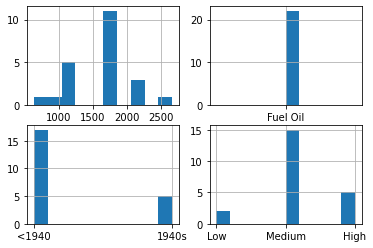

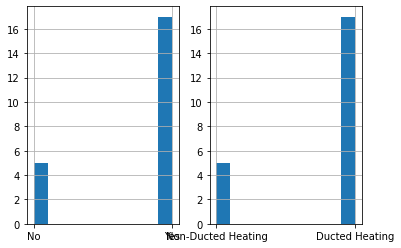

In [117]:
print_hists_of_subsets(test_metadata_df_heatfuel)
print_hvac_chars(test_metadata_df_heatfuel)


The majority of fuel oil buildings:
* Are between 1000 and 1600 sq. ft.
* Are built before 1940
* Have medium usage
* Have ducted heating 

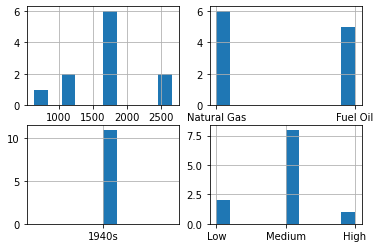

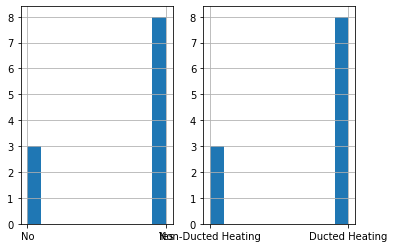

In [118]:
print_hists_of_subsets(test_metadata_df_vintage)
print_hvac_chars(test_metadata_df_vintage)

The majority of building built in 1940:
* Are ~1600 sq. ft.
* _Slightly_ are natural gas heated
* Have medium usage
* Have ducted heating

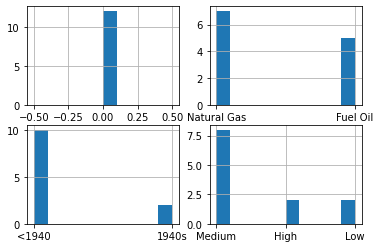

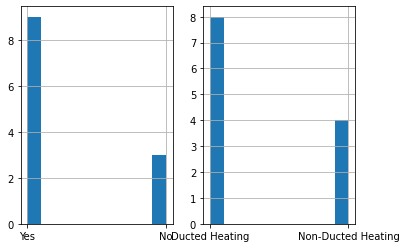

In [119]:
print_hists_of_subsets(test_metadata_df_gfla)
print_hvac_chars(test_metadata_df_gfla)
# Showing the sqft as 0, but it's actually a consistent 1220 sq.ft. for all entries if you print it out

The majority of buildings between 1000 and 1499 sq. ft.:
* Are 1220 sq. ft.
* _Slightly_ are natural gas heated
* Are built before 1940
* Have medium usage
* Have ducted heating

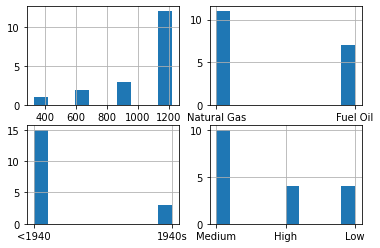

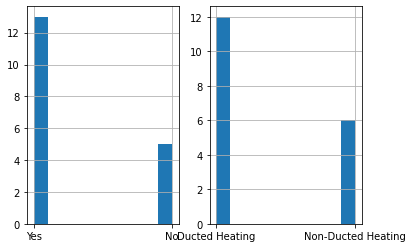

In [120]:
print_hists_of_subsets(test_metadata_df_gflabin)
print_hvac_chars(test_metadata_df_gflabin)

The majority of buildings between 0 and 1499 sq. ft.:
* Are 1200 sq. ft.
* Are _slightly_ nat. gas heated
* Were built before 1940
* Have medium usage
* Have ducted heating

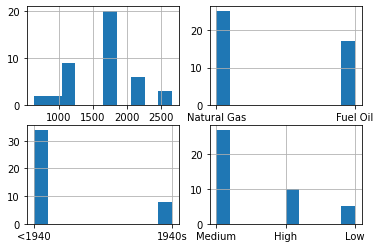

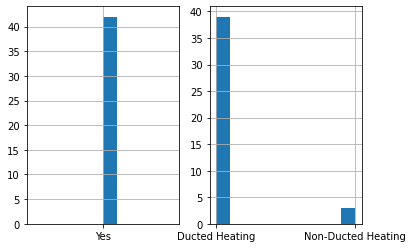

In [123]:
print_hists_of_subsets(test_metadata_df_ducts)
print_hvac_chars(test_metadata_df_ducts)

The majority of buildings with ducts:
* Are between 1000 and 1600 sq. ft.
* Are _slightly_ nat. gas heated
* Were built before 1940
* Have medium usage
* Have ducted heating

### Tangent
What does it mean to have ducts but have non-ducted heating??

In [126]:
test_metadata_df_ducts[test_metadata_df_ducts["in.hvac_heating_type"]=="Non-Ducted Heating"][[
    "bldg_id", "in.sqft", "in.clothes_dryer", "in.clothes_washer", "in.cooking_range",
    "in.dishwasher", "in.ducts", "in.heating_fuel", "in.hot_water_fixtures", "in.hvac_has_ducts",
    "in.hvac_heating_type", "in.refrigerator", "in.usage_level", "in.vintage",
    "in.water_heater_fuel"
]]

,bldg_id,in.sqft,in.clothes_dryer,in.clothes_washer,in.cooking_range,in.dishwasher,in.ducts,in.heating_fuel,in.hot_water_fixtures,in.hvac_has_ducts,in.hvac_heating_type,in.refrigerator,in.usage_level,in.vintage,in.water_heater_fuel
7,28939,2176.0,"Gas, 100% Usage","EnergyStar, 100% Usage","Gas, 100% Usage",None,"30% Leakage, R-4",Natural Gas,100% Usage,Yes,Non-Ducted Heating,"EF 6.7, 100% Usage",Medium,<1940,Natural Gas
189,457157,1220.0,"Electric, 100% Usage","Standard, 100% Usage","Electric, 100% Usage",None,"20% Leakage, Uninsulated",Natural Gas,100% Usage,Yes,Non-Ducted Heating,"EF 19.9, 100% Usage",Medium,<1940,Natural Gas
221,516321,1690.0,"Electric, 80% Usage","Standard, 80% Usage","Propane, 80% Usage","290 Rated kWh, 80% Usage","10% Leakage, Uninsulated",Natural Gas,50% Usage,Yes,Non-Ducted Heating,"EF 15.9, 100% Usage",Low,<1940,Natural Gas


# TODO
Wrap up some findings here. Then continue by looking at the process for pulling load shapes for individual appliances from ResStock and/or https://loadshape.epri.com/ so that we can have that process in place.

We want to pull a single load shape for a gas stove and then one for a replacement stove (gas replace or electric replace) that we can feed through the entire model.

Note that this will require some modeling changes to add the proper attributes to the Stove/Asset model